# Import Libraries

In [1]:
import os,shutil
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [3]:
from keras.applications import VGG16

# Create Directories for Small Data Set

In [4]:
source_base_dir = '/Users/shruthiravi/Documents/Shruthi 9th grade/SkinLesionsSF18/skin_lesion/source'

In [5]:
train_dir = os.path.join(source_base_dir, 'train')
valid_dir = os.path.join(source_base_dir, 'valid')
test_dir = os.path.join(source_base_dir, 'test')

# Verify Image Counts

In [6]:
for group in [train_dir, valid_dir, test_dir]:
    for disease in ['melanoma', 'nevus', 'seborrheic_keratosis']:
        folder = os.path.join(group,disease)
        print('total', group.split('/')[-1],disease,'images:', len(os.listdir(folder)))
    print('')

total train melanoma images: 374
total train nevus images: 1372
total train seborrheic_keratosis images: 254

total valid melanoma images: 30
total valid nevus images: 78
total valid seborrheic_keratosis images: 42

total test melanoma images: 117
total test nevus images: 393
total test seborrheic_keratosis images: 90



# Data Preprocessing: Create Image Batch Generators

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(330,330),
    batch_size=25,
    class_mode='categorical')

Found 2000 images belonging to 3 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(330,330),
    batch_size=25,
    class_mode='categorical')

Found 150 images belonging to 3 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (25, 330, 330, 3)
labels batch shape: (25, 3)


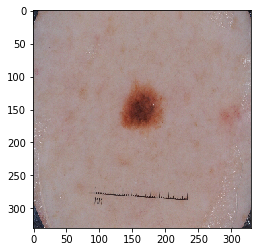

In [13]:
plt.imshow(image.array_to_img(data_batch[1]))
plt.show()

In [14]:
labels_batch[1]

array([ 0.,  1.,  0.], dtype=float32)

# Define the Model

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(330,330,3)))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation='relu'))
#model.add(layers.Conv2D(128,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(3,activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 328, 328, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 164, 164, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 162, 162, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 81, 81, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 79, 79, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 194688)            0         
__________

### Configuring model for training

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-3),
             metrics=['acc'])

# Fitting model using Batch Generator

In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 1891s 19s/step - loss: 5.1172 - acc: 0.6744 - val_loss: 7.7496 - val_acc: 0.5192
Epoch 2/5
100/100 [==============================] - 1769s 18s/step - loss: 5.0933 - acc: 0.6840 - val_loss: 7.7496 - val_acc: 0.5192
Epoch 3/5
100/100 [==============================] - 1768s 18s/step - loss: 4.9708 - acc: 0.6916 - val_loss: 7.7625 - val_acc: 0.5184
Epoch 4/5
100/100 [==============================] - 1589s 16s/step - loss: 5.0482 - acc: 0.6868 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 5/5
100/100 [==============================] - 1635s 16s/step - loss: 4.9837 - acc: 0.6908 - val_loss: 7.7109 - val_acc: 0.5216


# Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
train_melanoma_dir = os.path.join(train_dir, 'melanoma')
fnames = [os.path.join(train_melanoma_dir, fname) for
         fname in os.listdir(train_melanoma_dir)]

In [10]:
img_path = fnames[3]

In [12]:
img = image.load_img(img_path, target_size=(512,512))

In [13]:
x = image.img_to_array(img)

In [14]:
x = x.reshape((1,) + x.shape)

In [15]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0 :
        break

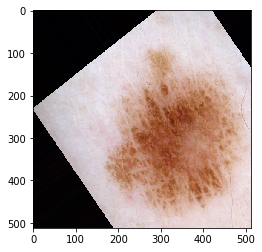

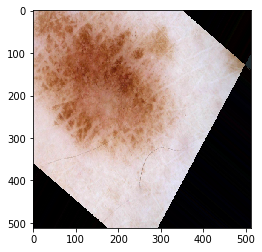

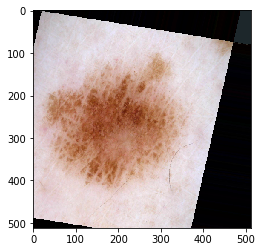

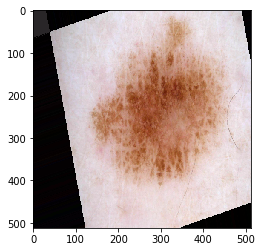

In [16]:
plt.show()

In [17]:
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=-.2,
    horizontal_flip=True,)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512,512),
    batch_size=25,
    class_mode='binary')

Found 2000 images belonging to 3 classes.


In [19]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(512,512),
    batch_size=25,
    class_mode='binary')

Found 150 images belonging to 3 classes.


In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(512,512,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(3,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000/25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=150/25)

Epoch 1/20


ValueError: Error when checking target: expected dense_2 to have shape (None, 3) but got array with shape (25, 1)

# Importing VGG16 Model

In [66]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(512,512,3))

In [67]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________